# Proyecto Gold Recovery 

In [3]:
# Importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


In [5]:
# Cargar los datos
train = pd.read_csv('datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
full = pd.read_csv('datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

# Mostrar tamaños
print("Tamaño de cada dataset:")
print("Train:", train.shape)
print("Test:", test.shape)
print("Full:", full.shape)


Tamaño de cada dataset:
Train: (16860, 86)
Test: (5856, 52)
Full: (22716, 86)


In [6]:
# Analizar datos del primer conjunto
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
# Analizar datos del segundo conjunto
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
# Analizar datos del tercer conjunto
full.info()
full.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
# Extraer columnas necesarias
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

# Calcular recuperación
recovery_calc = C * (F - T) / (F * (C - T)) * 100

# Valores reales
recovery_real = train['rougher.output.recovery']

# Eliminar filas con NaN en ambos (para poder comparar)
mask = recovery_real.notna() & recovery_calc.notna()
recovery_calc = recovery_calc[mask]
recovery_real = recovery_real[mask]

# Calcular Error Absoluto Medio (EAM)
eam = mean_absolute_error(recovery_real, recovery_calc)
print(f'Error Absoluto Medio (EAM) entre recuperación real y calculada: {eam:,.5f}')


Error Absoluto Medio (EAM) entre recuperación real y calculada: 0.00000


In [10]:
# Lista de columnas del entrenamiento y prueba
train_cols = train.columns
test_cols = test.columns

# Ver columnas que están en entrenamiento pero no en prueba
missing_cols = set(train_cols) - set(test_cols)
print(f'Columnas ausentes en el conjunto de prueba:\n{sorted(missing_cols)}')


Columnas ausentes en el conjunto de prueba:
['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'r

**NOTA:**

El conjunto de prueba no contiene todas las columnas, porque algunas solo están disponibles después del proceso (por ejemplo, columnas de salida como rougher.output.* o final.output.*).
Como no se pueden usar para predecir, se debe entrenar el modelo solo con las columnas disponibles también en el test.

In [11]:
# Columnas disponibles tanto en entrenamiento como prueba
features = sorted(list(set(train.columns) & set(test.columns)))
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

# Asegúrate de que los targets no tengan NaNs
df_model = train.dropna(subset=features + [target_rougher, target_final])

X_train = df_model[features]
y_train_rougher = df_model[target_rougher]
y_train_final = df_model[target_final]

# Para el test (usado al final para predecir y evaluar), solo quedan las features
X_test = test[features]


In [12]:
# Diccionario para guardar los resultados
concentraciones_promedio = {}

# Etapas a evaluar
etapas = {
    'Feed': 'rougher.input.feed_',
    'Rougher Concentrate': 'rougher.output.concentrate_',
    'Final Concentrate': 'final.output.concentrate_',
    'Tail': 'rougher.output.tail_'
}

metales = ['au', 'ag', 'pb']

# Calculamos el promedio por etapa y metal
for metal in metales:
    concentraciones_promedio[metal] = {}
    for nombre_etapa, prefijo in etapas.items():
        columna = prefijo + metal
        if columna in train.columns:
            promedio = train[columna].mean()
            concentraciones_promedio[metal][nombre_etapa] = promedio

# Convertir a DataFrame para visualizar mejor
df_concentraciones = pd.DataFrame(concentraciones_promedio)
print("\nPromedio de concentraciones por etapa:\n")
print(df_concentraciones.round(2))


Promedio de concentraciones por etapa:

                        au     ag    pb
Feed                  7.17   7.83  3.22
Rougher Concentrate  17.40  10.58  6.88
Final Concentrate    39.47   4.72  9.11
Tail                  1.76   5.57  0.60


**NOTA:**
 <br> AU (Oro): La concentración aumenta mucho.
 <br> AG y PB (impurezas): AG disminuyen en el concentrado final y PB no lo hace.
 <br> Las colas (tail) tienen bajo contenido de oro.

In [13]:
# Asegurarnos de que ambos estén ordenados por fecha
train = train.sort_index()
test = test.sort_index()

# Unir las columnas relevantes para comparar
train_sizes = train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
test_sizes = test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]


In [14]:
comparacion = pd.DataFrame({
    'Train mean': train_sizes.mean(),
    'Test mean': test_sizes.mean(),
    'Train std': train_sizes.std(),
    'Test std': test_sizes.std()
})
print(comparacion.round(2))


                                 Train mean  Test mean  Train std  Test std
rougher.input.feed_size               58.68      55.94      23.92     22.72
primary_cleaner.input.feed_size        7.30       7.26       0.62      0.61


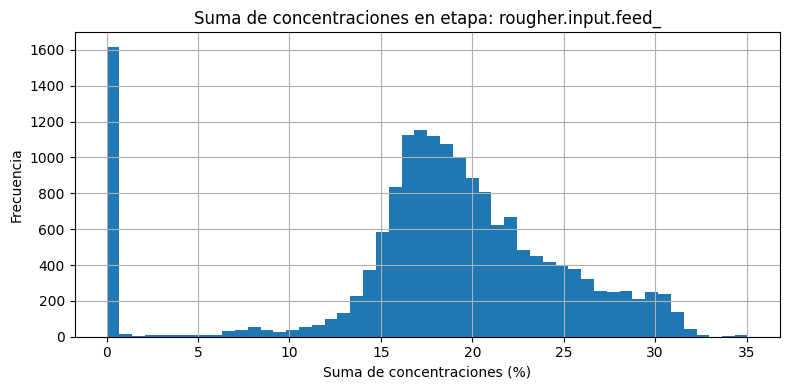

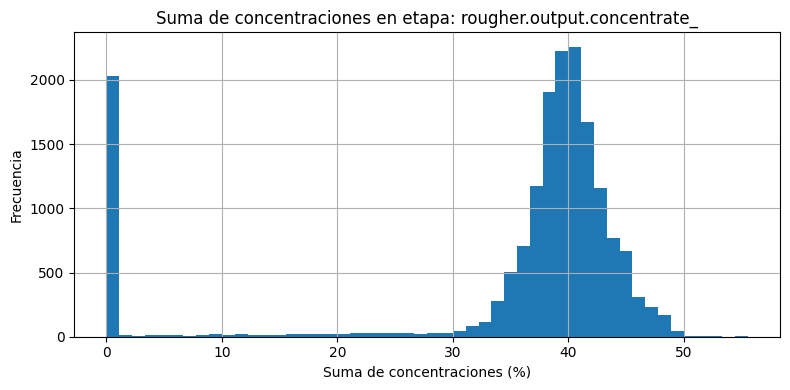

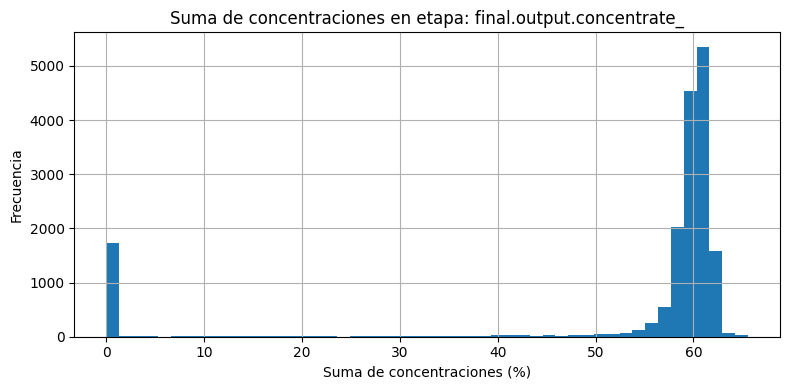

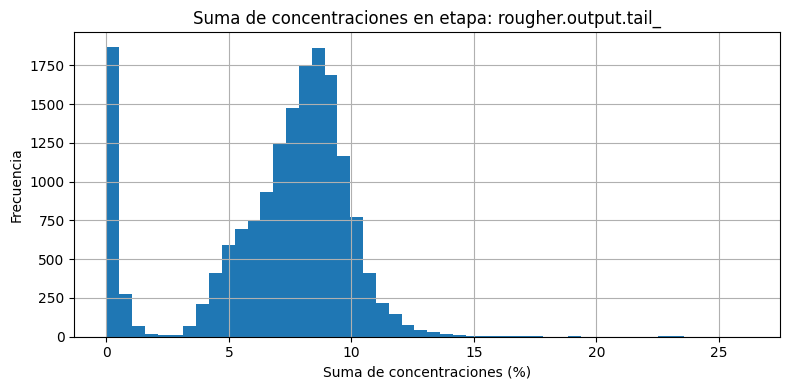

In [ ]:
# Etapas a revisar
etapas = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'final.output.concentrate_',
    'rougher.output.tail_'
]

metales = ['au', 'ag', 'pb']

# Analizar la suma de concentraciones por etapa
for etapa in etapas:
    columnas = [etapa + metal for metal in metales if etapa + metal in train.columns]
    
    # Si existen las columnas, calculamos la suma
    if columnas:
        train[f'{etapa}total_conc'] = train[columnas].sum(axis=1)
        
        plt.figure(figsize=(8, 4))
        train[f'{etapa}total_conc'].hist(bins=50)
        plt.title(f'Suma de concentraciones en etapa: {etapa}')
        plt.xlabel('Suma de concentraciones (%)')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [15]:
# Etapas a revisar
etapas = {
    'rougher.input.feed_': 'feed',
    'rougher.output.concentrate_': 'rougher_conc',
    'final.output.concentrate_': 'final_conc',
    'rougher.output.tail_': 'tail'
}

for prefijo, nombre in etapas.items():
    columnas = [prefijo + metal for metal in metales if prefijo + metal in train.columns]
    if columnas:
        train[f'{nombre}_total_conc'] = train[columnas].sum(axis=1)

# Condición para mantener solo filas válidas
condicion_valida = (
    (train['feed_total_conc'] >= 1) &
    (train['rougher_conc_total_conc'] >= 1) &
    (train['final_conc_total_conc'] >= 1) &
    (train['tail_total_conc'] >= 1)
)

# Aplicar la limpieza
train = train[condicion_valida]


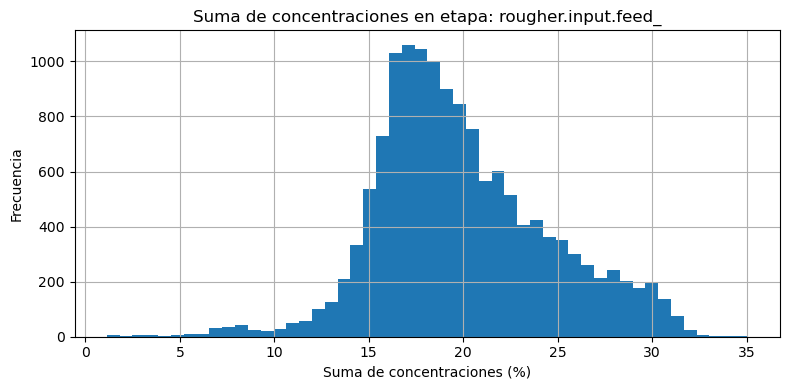

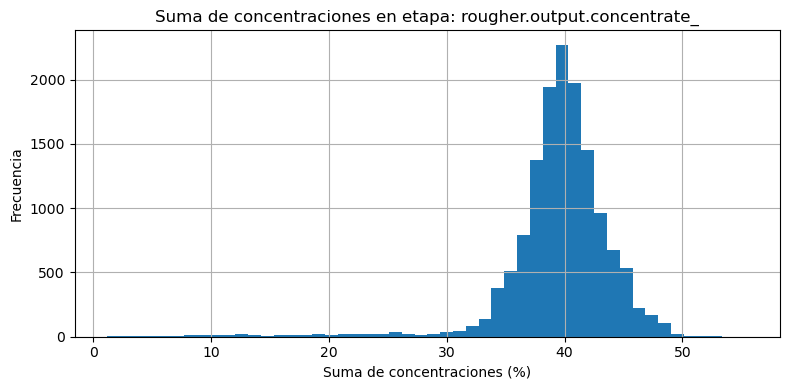

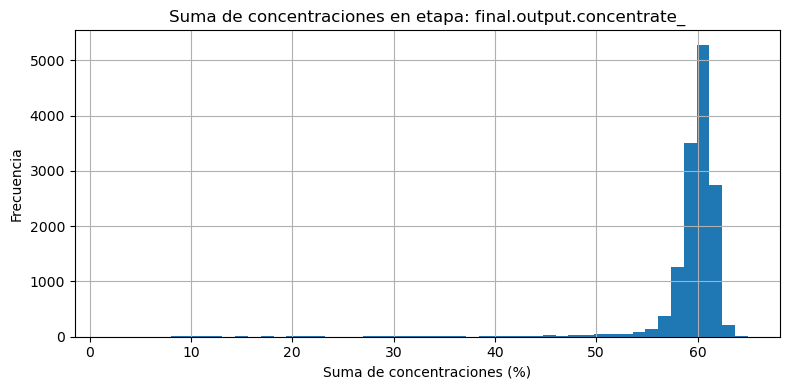

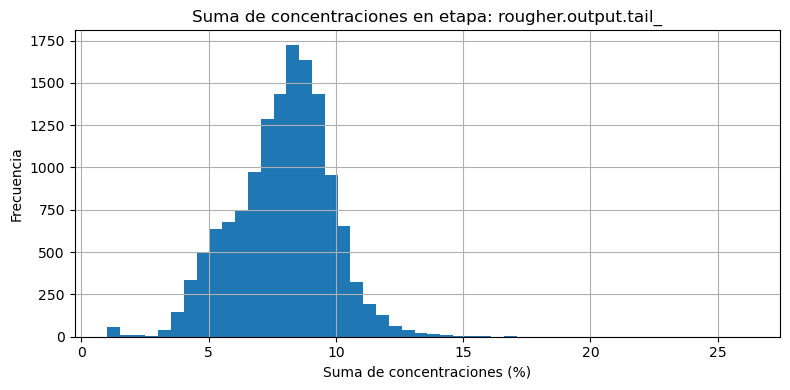

In [16]:
for etapa in etapas:
    columnas = [etapa + metal for metal in metales if etapa + metal in train.columns]
    
    # Si existen las columnas, calculamos la suma
    if columnas:
        train[f'{etapa}total_conc'] = train[columnas].sum(axis=1)
        
        plt.figure(figsize=(8, 4))
        train[f'{etapa}total_conc'].hist(bins=50)
        plt.title(f'Suma de concentraciones en etapa: {etapa}')
        plt.xlabel('Suma de concentraciones (%)')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

**NOTA:**
<br> Se eliminaron filas donde las concentraciones totales eran muy bajas o nulas.


In [17]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2

    # Evitar división por cero
    mask = denominator != 0
    return np.mean(numerator[mask] / denominator[mask]) * 100

# sMAPE final ponderado
def smape_final(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_r = smape(y_true_rougher, y_pred_rougher)
    smape_f = smape(y_true_final, y_pred_final)
    return 0.25 * smape_r + 0.75 * smape_f
    
def smape_scorer(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = (denominator != 0) & (~np.isnan(numerator)) & (~np.isnan(denominator))
    if np.sum(mask) == 0:
        return np.nan
    return np.mean(numerator[mask] / denominator[mask]) * 100

# Convertirlo en scorer negativo (porque cross_val_score maximiza)
neg_smape = make_scorer(smape_scorer, greater_is_better=False)

In [ ]:
# # --- Buscar mejores combinaciones ---
# mejor_modelo = None
# mejor_params = {}
# mejor_smape = float('inf')

# print("Probando combinaciones...\n")

# # Probar Random Forest con distintas combinaciones
# for n in range(5, 101, 10):
#     for d in range (3, 7):
#         modelo = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        
#         score_r = -cross_val_score(modelo, X_train, y_train_rougher, cv=5, scoring=neg_smape).mean()
#         score_f = -cross_val_score(modelo, X_train, y_train_final, cv=5, scoring=neg_smape).mean()
#         total = 0.25 * score_r + 0.75 * score_f

#         print(f"RandomForest (n={n}, depth={d}) → sMAPE: Rougher={score_r:.2f}%, Final={score_f:.2f}%, Total={total:.2f}%")
        
#         if total < mejor_smape:
#             mejor_smape = total
#             mejor_modelo = "RandomForest"
#             mejor_params = {'n_estimators': n, 'max_depth': d}

# # Probar Decision Tree con distintas profundidades
# for d in range(3, 11):
#     modelo = DecisionTreeRegressor(max_depth=d, random_state=12345)

#     score_r = -cross_val_score(modelo, X_train, y_train_rougher, cv=5, scoring=neg_smape).mean()
#     score_f = -cross_val_score(modelo, X_train, y_train_final, cv=5, scoring=neg_smape).mean()
#     total = 0.25 * score_r + 0.75 * score_f

#     print(f"DecisionTree (depth={d}) → sMAPE: Rougher={score_r:.2f}%, Final={score_f:.2f}%, Total={total:.2f}%")

#     if total < mejor_smape:
#         mejor_smape = total
#         mejor_modelo = "DecisionTree"
#         mejor_params = {'max_depth': d}

# # --- Mostrar el mejor resultado ---
# print("\n Mejor modelo encontrado:")
# print(f"Modelo: {mejor_modelo}")
# print(f"Parámetros: {mejor_params}")
# print(f"sMAPE Total: {mejor_smape:.2f}%")

# **NOTA:**
El código anterior decidí dejarlo comentado debido al tiempo que tarda en compilar.
<BR> El código realiza una búsqueda para encontrar los mejores hiperparámetros tanto en ramdom forest como en decision tree y el resultado fue usar RANDOM FOREST n=5, d=4.

In [18]:
# Lista de modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=5, max_depth=4, random_state=12345),
    #"DecisionTree": DecisionTreeRegressor(max_depth=6, random_state=12345)
}

# Diccionarios para guardar resultados
resultados_rougher = {}
resultados_final = {}

# Evaluar cada modelo con cross_val_score para cada objetivo
for nombre, modelo in modelos.items():
    # Rougher
    scores_r = cross_val_score(modelo, X_train, y_train_rougher, cv=5, scoring=neg_smape)
    # Final
    scores_f = cross_val_score(modelo, X_train, y_train_final, cv=5, scoring=neg_smape)
    
    # Convertimos a positivos (porque smape es error, más bajo es mejor)
    resultados_rougher[nombre] = -scores_r.mean()
    resultados_final[nombre] = -scores_f.mean()

In [19]:
# --- Mostrar resultados ---
print("Modelo              | sMAPE Rougher  | sMAPE Final  | sMAPE Total")
print("-" * 80)

for nombre in modelos.keys():
    r = resultados_rougher[nombre]
    f = resultados_final[nombre]
    total = 0.25 * r + 0.75 * f
    print(f"{nombre:<19} | {r:>13.2f}% | {f:>11.2f}% | {total:>11.2f}%")

Modelo              | sMAPE Rougher  | sMAPE Final  | sMAPE Total
--------------------------------------------------------------------------------
LinearRegression    |         10.85% |       10.96% |       10.93%
RandomForest        |         10.47% |        9.29% |        9.58%


In [20]:
# Obtener etiquetas verdaderas desde el conjunto completo
y_test_rougher = full.loc[X_test.index, 'rougher.output.recovery']
y_test_final = full.loc[X_test.index, 'final.output.recovery']

# Paso 2: si hay NaNs en las etiquetas, filtra todo junto
mask = y_test_rougher.notna() & y_test_final.notna()
X_test = X_test[mask]
y_test_rougher = y_test_rougher[mask]
y_test_final = y_test_final[mask]

print(y_test_rougher.shape)
print(y_test_rougher.isna().sum())  # Debe ser 0


(5290,)
0


In [21]:
# Eliminar filas con NaN en X_test y etiquetas correspondientes
mask = ~X_test.isna().any(axis=1)
X_test = X_test[mask]
y_test_rougher = y_test_rougher[mask]
y_test_final = y_test_final[mask]

print("NaNs en X_train:", X_train.isna().sum().sum())
print("NaNs en X_test:", X_test.isna().sum().sum())

print("Valores infinitos en X_train:", np.isinf(X_train).sum().sum())
print("Valores infinitos en X_test:", np.isinf(X_test).sum().sum())

print("NaNs en y_train_rougher:", y_train_rougher.isna().sum())
print("NaNs en y_train_final:", y_train_final.isna().sum())
print("NaNs en y_test_rougher:", y_test_rougher.isna().sum())
print("NaNs en y_test_final:", y_test_final.isna().sum())


NaNs en X_train: 0
NaNs en X_test: 0
Valores infinitos en X_train: 0
Valores infinitos en X_test: 0
NaNs en y_train_rougher: 0
NaNs en y_train_final: 0
NaNs en y_test_rougher: 0
NaNs en y_test_final: 0


In [22]:
# --- Entrenar modelo óptimo con TODOS los datos de entrenamiento ---
best_model_r = RandomForestRegressor(n_estimators=5, max_depth=4, random_state=12345)
best_model_f = RandomForestRegressor(n_estimators=5, max_depth=4, random_state=12345)

best_model_r.fit(X_train, y_train_rougher)
best_model_f.fit(X_train, y_train_final)

# --- Predecir sobre X_test ---
y_pred_r = best_model_r.predict(X_test)
y_pred_f = best_model_f.predict(X_test)

# --- Calcular sMAPE final ---
smape_r = smape(y_test_rougher.values, y_pred_r)
smape_f = smape(y_test_final.values, y_pred_f)
smape_total = smape_final(y_test_rougher.values, y_pred_r, y_test_final.values, y_pred_f)

# --- Mostrar resultados ---
print(f"sMAPE Rougher (test): {smape_r:.2f}%")
print(f"sMAPE Final   (test): {smape_f:.2f}%")
print(f"sMAPE Total   (test): {smape_total:.2f}%")

sMAPE Rougher (test): 9.84%
sMAPE Final   (test): 9.79%
sMAPE Total   (test): 9.80%


**CONCLUSION**

El modelo predice con un error promedio del 9.8% en las etapas clave del proceso de recuperación de oro.